<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220801_%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%AC%B8%EC%A0%9C(study_ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [ ]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '*.zip' -d/content

Archive:  craigslist-carstrucks-data.zip
replace /content/vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/vehicles.csv')
df.tail(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


- Columns / 필요유무
- id : 게시물 id / x
- url : 자동차 판매 웹사이트 / x
- region : 자동차 관리 지점
- region_url : 지점 홈페이지 주소 / x
- price : 가격 
- year : 생산연도 
- manufacturer : 제조사
- model : 모델명
- condition : 상태 
- cylinders : 기통 수
- fuel : 연료 타입 
- odometer : 주행거리(mile)
- title_status : 소유주 등록상태 
- transmission : 트랜스미션 종류
- vin : 차대번호 / x
- drive : 자동차 구동 타입
- size : 크기 
- type : 자동차 타입
- paint_color : 자동차 색 
- image_url : 이미지 url / x 
- description : 설명 / x
- state : 거래 업로드한 주 
- lat : 위도 / x

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
# 칼럼별 결측치 갯수 확인
df.isna().sum() 

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop(['id','url','region_url','title_status','VIN','county','description',
         'state','lat','long','image_url','posting_date' ],
        axis=1, inplace = True) #필요없는 칼럼 삭제

In [ ]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['age'] = 2021 - df['year'] # 제조년도를 몇년 됐는지로 바꿈 칼럼생성
df.drop('year', axis = 1, inplace = True) # 겹치는 제조년도 칼럼 삭제
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [ ]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [ ]:
len(df['manufacturer'].value_counts()) # 제조사 갯수확인

42

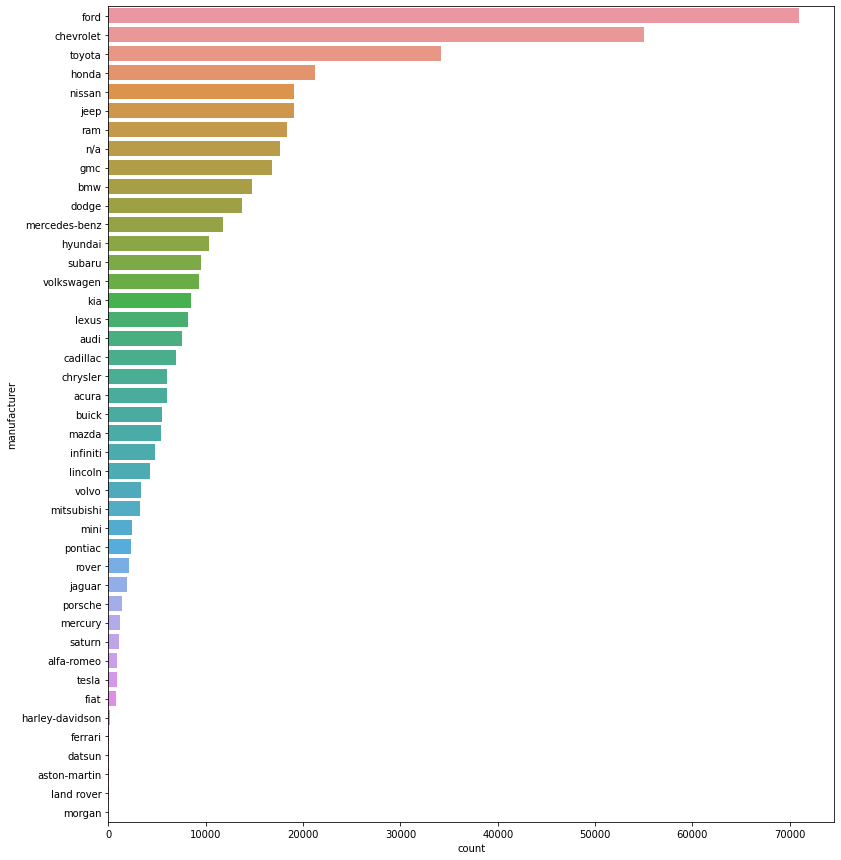

In [ ]:
fig = plt.figure(figsize=(13,15))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), # na 값을 'n/a'로 변환해서 오류방지와 같이 시각화 가능
              order=df.fillna('n/a')['manufacturer'].value_counts().index) 

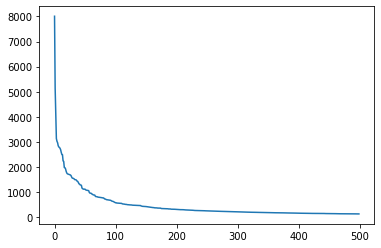

In [ ]:
plt.plot(range(len(df['model'].value_counts()[:500])),
         df['model'].value_counts()[:500]) # 상위 500개 모델 별 중고차 갯수

In [ ]:
# 자동차 모델명 카운트
df['model'].value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [ ]:
df['condition'].value_counts() # salvage는 침수차, 사고차로 추정

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

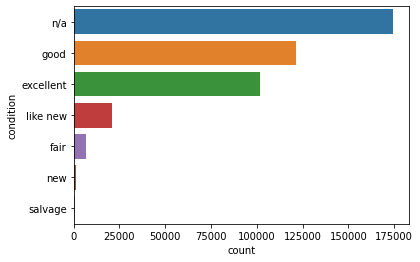

In [ ]:
# 컨디션 n/a 갯수가 많은걸로 봐서 상태 안좋으면 nan값으로 추정
sns.countplot(y='condition', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['condition'].value_counts().index)

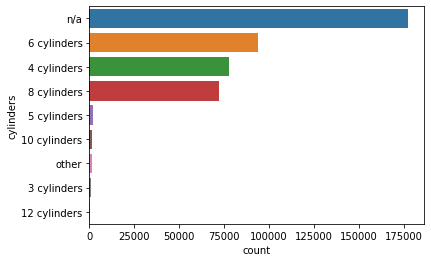

In [ ]:
# 자동차 기통수 시각화
sns.countplot(y='cylinders', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['cylinders'].value_counts().index)

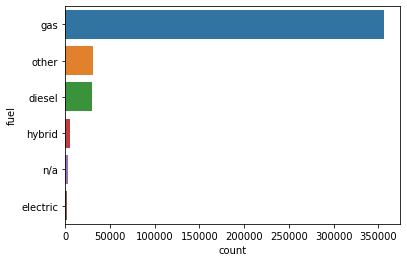

In [ ]:
# 연료타입 시각화
sns.countplot(y='fuel', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['fuel'].value_counts().index)

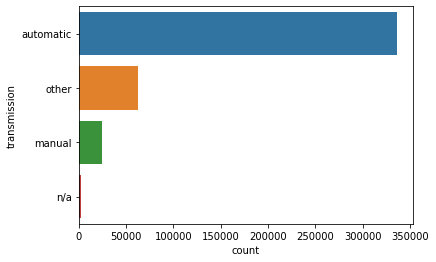

In [ ]:
# 트랜스미션 종류 타입 시각화
sns.countplot(y='transmission', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['transmission'].value_counts().index)

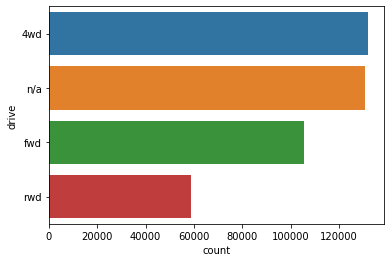

In [ ]:
# 구동타입 종류 시각화
sns.countplot(y='drive', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['drive'].value_counts().index)

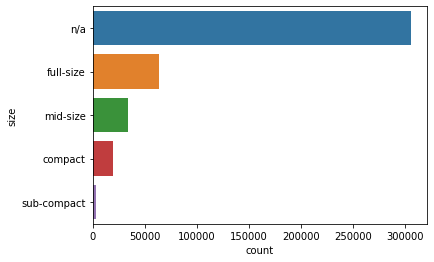

In [ ]:
# 크기 시각화
sns.countplot(y='size', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['size'].value_counts().index)

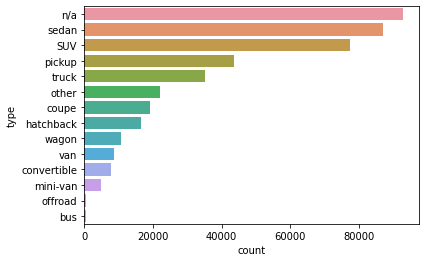

In [ ]:
# 자돋차 type 시각화
sns.countplot(y='type', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['type'].value_counts().index)

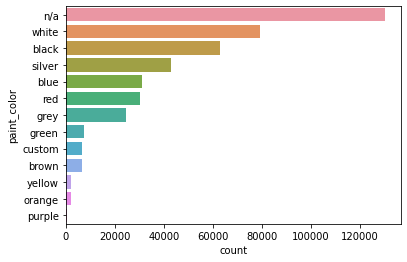

In [ ]:
# 색상 시각화
sns.countplot(y='paint_color', 
              data = df.fillna('n/a'),
              order= df.fillna('n/a')['paint_color'].value_counts().index)

In [ ]:
# 수치형 데이터의 통계 분석하기
df['price'].max()

3736928711

In [ ]:
df['price'].min()

0

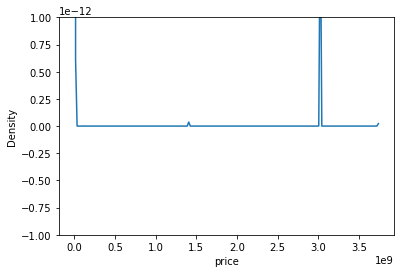

In [ ]:
sns.kdeplot(x=df['price'])

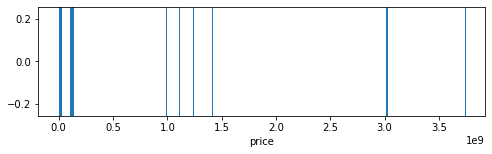

In [ ]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
# rugplot: 실수 분포 플롯. 자료의 분포를 묘사하기 위한 것으로
# 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터의 위치를 보여준다.
# 선분이 두꺼우면 값이 많은 곳 히스토그램과 유사
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='price', data=df, height=1) 

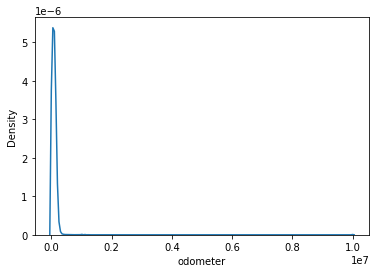

In [ ]:
# 주행거리
sns.kdeplot(x=df['odometer'])

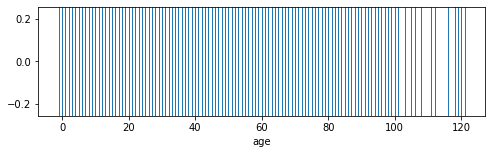

In [ ]:
# 연도별 차량 분포
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='age', data=df, height=1) 

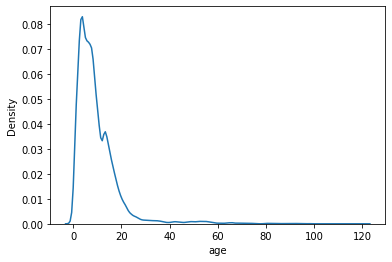

In [ ]:
sns.kdeplot(x=df['age'])

In [ ]:
# 가격 이상치 확인
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.1))

44500.0
500.0


In [ ]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.1)

In [ ]:
# 불린 인덱싱을 이용한 이상치 제거
df = df[(p1 > df['price']) & (df['price'] > p2)] 

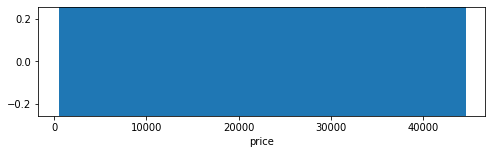

In [ ]:
# 분포가 빽빽하게 밀집해있음을 알 수 있다.
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='price', data = df, height = 1)

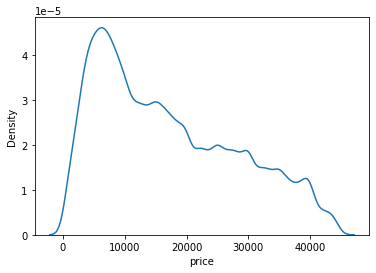

In [ ]:
sns.kdeplot(x=df['price'])

In [ ]:
# 주행거리 이상치 제거 28만 마일 = 약 45만 km
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

280000.0 17273.0


In [ ]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

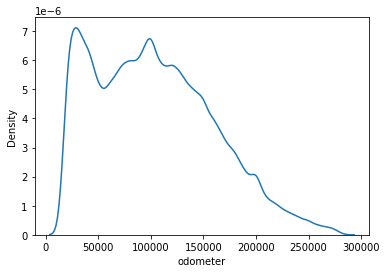

In [ ]:
sns.kdeplot(x=df['odometer'])

In [ ]:
df.isna().sum()

region               0
price                0
manufacturer     10946
model             3214
condition       121779
cylinders       123638
fuel              1942
odometer             0
transmission      1247
drive            95299
size            222903
type             70112
paint_color      92213
age                420
dtype: int64

In [ ]:
df.head() # index 0~26과 여러 샘플이 제거됨

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [ ]:
manu_count = df['manufacturer'].value_counts()
manu_count.sort_values(ascending = False,  inplace = True) # 내림차순 정렬 하고 유지 ascending / inplace
manu_count

ford               51944
chevrolet          40751
toyota             27307
honda              17669
nissan             15200
jeep               14569
gmc                11986
bmw                11972
ram                11893
dodge               9941
mercedes-benz       8565
hyundai             8054
subaru              7814
volkswagen          7188
lexus               6715
kia                 6454
audi                6088
chrysler            5104
cadillac            5002
acura               4472
buick               4075
mazda               3899
infiniti            3780
lincoln             3137
volvo               2584
mitsubishi          2280
pontiac             2045
mini                1957
rover               1472
jaguar              1254
mercury             1018
saturn               993
porsche              970
fiat                 527
alfa-romeo           512
tesla                508
harley-davidson       70
datsun                56
land rover             9
ferrari                6


In [ ]:
manu_idx = manu_count.index[7:] # 상위 6개 제외한 제조사
manu_idx

Index(['bmw', 'ram', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen', 'lexus', 'kia', 'audi', 'chrysler', 'cadillac', 'acura',
       'buick', 'mazda', 'infiniti', 'lincoln', 'volvo', 'mitsubishi',
       'pontiac', 'mini', 'rover', 'jaguar', 'mercury', 'saturn', 'porsche',
       'fiat', 'alfa-romeo', 'tesla', 'harley-davidson', 'datsun',
       'land rover', 'ferrari', 'aston-martin', 'morgan'],
      dtype='object')

In [ ]:
df = df.reset_index() # 인덱스 번호 초기화

In [ ]:
df.head()

,index,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [ ]:
del df['index'] # 튀어나온 index 컬럼 삭제

In [ ]:
# manu_idx = manu_count.index[7:] # 상위 6개 제외한 제조사

df['manufacturer'].fillna('other', inplace=True)
# dfmaun의 컬림 값이 manu_idx에 있는 데이터는 other
for num in range(len(df['manufacturer'])): 
  if str(df.iloc[num]['manufacturer']) in manu_idx:
    df.at[num,'manufacturer'] = 'others'

In [ ]:
df = df.replace({'manufacturer':'other'},'others') # 겹친값 하나로 변경

In [ ]:
df['manufacturer'].value_counts()

others       141365
ford          51944
chevrolet     40751
toyota        27307
honda         17669
nissan        15200
jeep          14569
gmc           11986
Name: manufacturer, dtype: int64

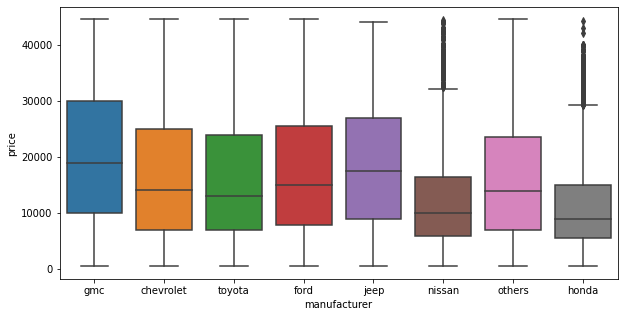

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y ='price',data=df)

In [ ]:
from tqdm.notebook import tqdm

model_count = df['model'].value_counts()
model_count.sort_values(ascending = False, inplace = True)
model_idx = model_count.index[14:]
df['model'].fillna('other', inplace = True) # df['model']에 있는 NaN 값을 'other'로 변경

# df['model']의 컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['model']))):
  if str(df.iloc[num]['model']) in model_idx:
    df.at[num, 'model'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

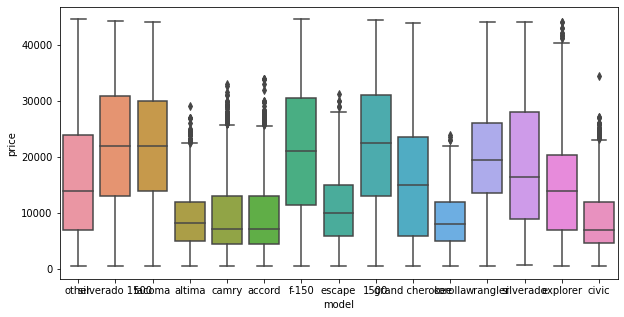

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='model', y ='price',data=df)

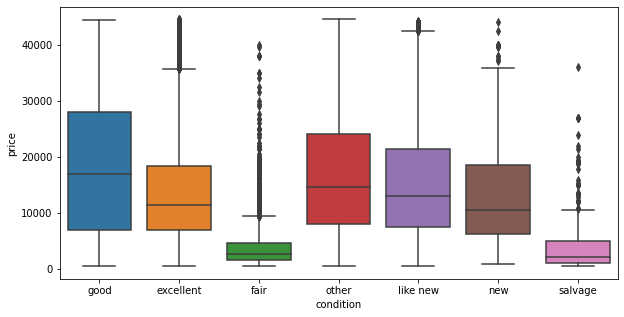

In [ ]:
df['condition'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='condition', y ='price',data=df)

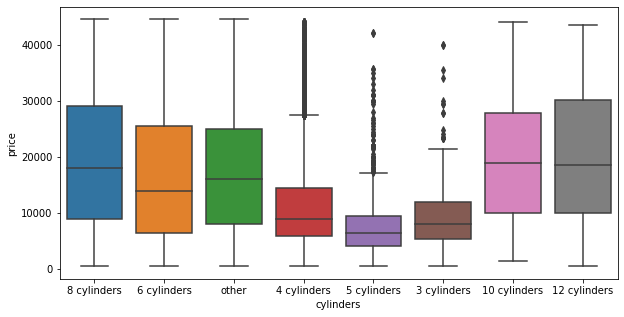

In [ ]:
df['cylinders'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='cylinders', y ='price',data=df)

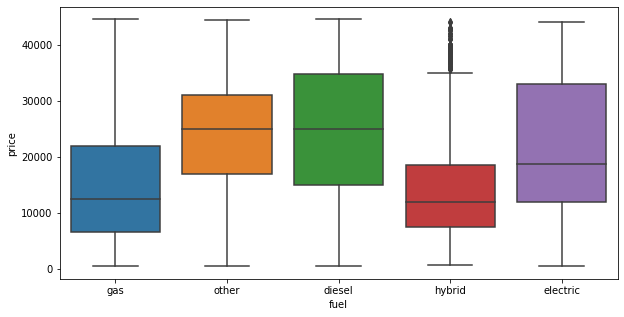

In [ ]:
df['fuel'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='fuel', y ='price',data=df)

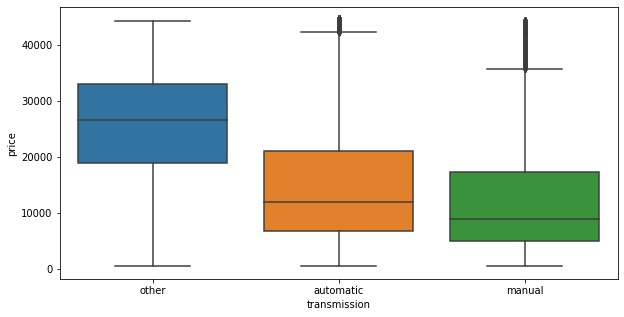

In [ ]:
df['transmission'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='transmission', y ='price',data=df)

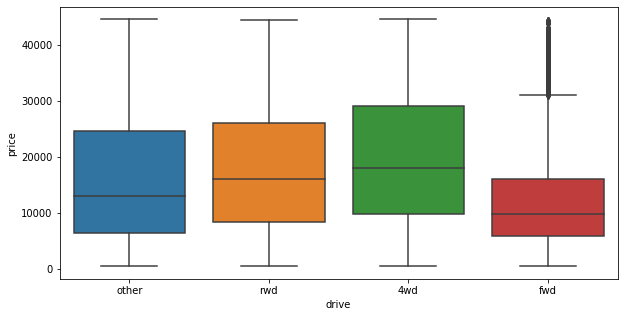

In [ ]:
df['drive'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='drive', y ='price',data=df)

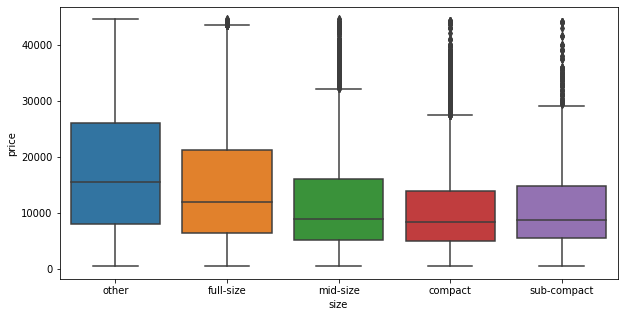

In [ ]:
df['size'].fillna('other', inplace=True) 
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='size', y ='price',data=df)

In [ ]:
from tqdm.notebook import tqdm

type_count = df['type'].value_counts()
type_count.sort_values(ascending = False, inplace = True)
type_idx = type_count.index[5:] # 남길 갯수 지정
df['type'].fillna('other', inplace = True) # df['type']에 있는 NaN 값을 'other'로 변경

# df['type']의 컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['type']))):
  if str(df.iloc[num]['type']) in type_idx:
    df.at[num, 'type'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

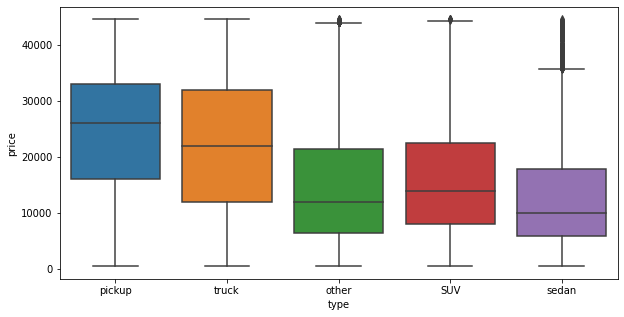

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='price', data = df)

In [ ]:
from tqdm.notebook import tqdm

color_count = df['paint_color'].value_counts()
color_count.sort_values(ascending = False, inplace = True)
color_idx = color_count.index[6:] # 남길 갯수 지정
df['paint_color'].fillna('other', inplace = True) # df['color']에 있는 NaN 값을 'other'로 변경

# df['color']의 컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['paint_color']))):
  if str(df.iloc[num]['paint_color']) in color_idx:
    df.at[num, 'paint_color'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

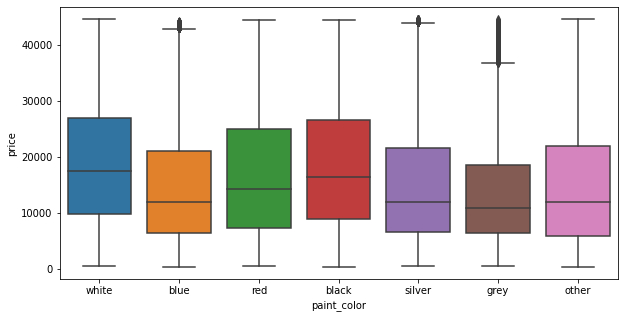

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='paint_color', y='price', data=df)

In [ ]:
df = df.replace({'paint_color':'paint_color'},'others') # 겹친값 하나로 변경

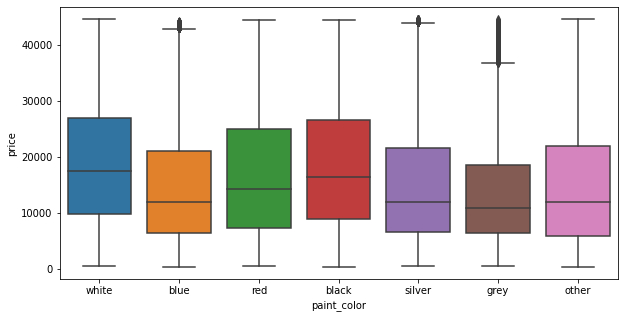

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='paint_color', y='price', data=df)

In [ ]:
df.isna().sum()

region            0
price             0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
transmission      0
drive             0
size              0
type              0
paint_color       0
age             420
dtype: int64

In [ ]:
df.dropna(inplace=True) # age에 있는 NaN을 삭제하기 위함

In [ ]:
df.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320371 entries, 0 to 320790
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        320371 non-null  object 
 1   price         320371 non-null  int64  
 2   manufacturer  320371 non-null  object 
 3   model         320371 non-null  object 
 4   condition     320371 non-null  object 
 5   cylinders     320371 non-null  object 
 6   fuel          320371 non-null  object 
 7   odometer      320371 non-null  float64
 8   transmission  320371 non-null  object 
 9   drive         320371 non-null  object 
 10  size          320371 non-null  object 
 11  type          320371 non-null  object 
 12  paint_color   320371 non-null  object 
 13  age           320371 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 36.7+ MB


In [ ]:
df.to_csv('./니차팔때.csv') #"./" 지금 이경로

### 모델 학습을 위한 데이터 전처리

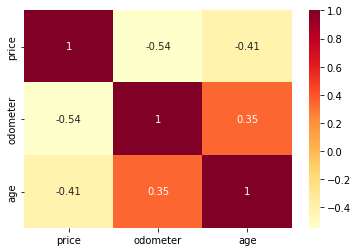

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

### 수치형 데이터 표준화 하기
#### 스케일링을 통해 기울기에 너무 많은 영향을 끼치지 않게함
#### - 표준화 방법 2개 min max 스케일러 or standard 스케일러 사용

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# 스케일 진행할 데이터 선택
X_num = df[['odometer','age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index= X_num.index,
                        columns=X_num.columns)

In [ ]:
X_scaled.head()

,odometer,age
0,-0.810223,-0.412012
1,-0.574689,0.061135
2,-1.496377,-1.121731
3,-1.107586,-0.766871
4,0.430229,-0.293725


### 범주형 데이터 원-핫 인코딩

In [ ]:
#get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price','odometer','age'], axis = 1)
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['price']

In [ ]:
X.head()

,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,-0.810223,-0.412012,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.574689,0.061135,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.496377,-1.121731,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-1.107586,-0.766871,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.430229,-0.293725,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


### 학습데이터와 테스트데이터 분리하기

In [ ]:
# 비율은 7:3, random_state는 1
from sklearn.model_selection import train_test_split

#train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

# LinearRegression 모델 생성 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
y_hat = lr.predict(X_test)
y_hat

array([  181.875,  -988.375, 15398.375, ..., 13557.625, 15999.   ,
       20389.875])

In [ ]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test}) # 예측값과 실제값 비교하기위해 배열생성
df_y

,y_hat,y
196426,181.875,2500
137038,-988.375,3880
83061,15398.375,22999
179793,19956.625,42902
6341,18558.375,22999
...,...,...
216722,21531.625,28990
63901,10136.250,3900
144435,13557.625,8300
279097,15999.000,3900


In [ ]:
df_y['차이']= df_y['y_hat']-df_y['y'] #새로운 칼럼 생성
df_y

,y_hat,y,차이
196426,181.875,2500,-2318.125
137038,-988.375,3880,-4868.375
83061,15398.375,22999,-7600.625
179793,19956.625,42902,-22945.375
6341,18558.375,22999,-4440.625
...,...,...,...
216722,21531.625,28990,-7458.375
63901,10136.250,3900,6236.250
144435,13557.625,8300,5257.625
279097,15999.000,3900,12099.000


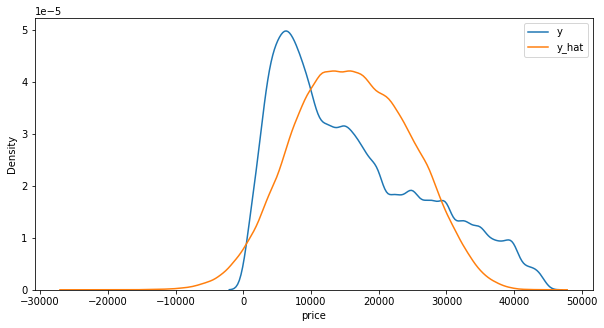

In [ ]:
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
# 커널 밀도 추정(KDE kernel Density Estimator)
# 쉽게 히스토그램과 같은 결과를 곡선형태로 표현한것
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1) # ax=ax1 설정으로 두개가 하나의 그래프에 출력
plt.legend() #범례
plt.show()

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

print('MAE', mean_absolute_error(y, y_hat)) # 평균절대값오차 <- 평균적으로 4972 정도의 오차 발생
print('MSE', mean_squared_error(y, y_hat))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y, y_hat))) # 평균제곱근오차 <- 차이가 크게난 값에 패널티를 주기때문에 오차가 더 크게나옴
print('R2', r2_score(y, y_hat)) # R2 스코어 <- 일관성을 나타내주는 지표 (상관계수와 유사)

MAE 4972.545129318821
MSE 44236095.11644093
RMSE 6651.022110656446
R2 0.6194423190507152


Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

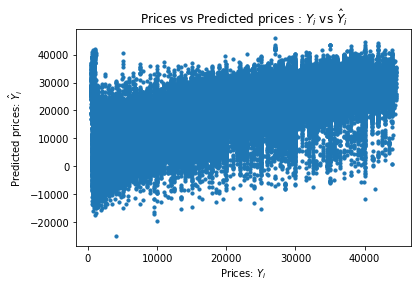

In [ ]:
plt.scatter(y, y_hat, s = 10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression( #사용한 모델 선언
    fit_intercept = True, normalize= False, copy_X=True, n_jobs=-1) # n_jobs = 사용할 cpu 갯수? -1이면 최대
lasso_regr = linear_model.Lasso(
    alpha = 0.01, fit_intercept=True,normalize=False, copy_X = True)
ridge_regr = linear_model.Ridge(
    alpha = 0.01, fit_intercept=True,normalize=False, copy_X = True)
SGD_regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                     max_iter=1000, tol=0.001, eta0=0.01) # L2 방법으로 경사하강법 1000번 진행


In [ ]:
# 라쏘
lasso_regr.fit(X_train,y_train)
print('intercept : ', lasso_regr.intercept_ ) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


intercept :  19999.987392536685


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+12, tolerance: 2.607e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# 릿지
ridge_regr.fit(X_train,y_train)
print('intercept : ', ridge_regr.intercept_ )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


intercept :  18645.714768187543


In [ ]:
# SGD
SGD_regr.fit(X_train,y_train)
print('intercept : ', SGD_regr.intercept_ )

intercept :  [18909.79306862]
